In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://www.gulfshorebusiness.com/collier-sustains-more-than-280m-in-hurricane-milton-damage/

In [ ]:
!pip install rasterio netCDF4 wxee timm cartopy osmnx xarray pyresample
!apt-get install -y gdal-bin
!pip install gdal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.0/345.0 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00

# $280 million loss in Hurricane Milton for Collier County

In [ ]:
!ls drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json

drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json


In [ ]:
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)
generate_dmsp = True

In [ ]:
!pip install timm
!pip install wxee

In [ ]:
import ee
import wxee
# wxee.Initialize()
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
import numpy as np
import xarray as xr

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np
from torch.utils.tensorboard import SummaryWriter

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [ ]:
import pandas as pd

# Data provided
cities = ['delhi', 'hongkong', 'melbourne', 'dubai', 'london', 'berlin', 'tokyo', 'dhaka', 'shanghai', 'saopaulo', 'mexicocity', 'cairo']
lats_  = [28.7041, 22.3193, -37.8136, 25.2048, 51.5072, 52.5200, 35.6764, 23.8041, 31.2304, -23.5558, 19.4326, 30.0444]
lons_  = [77.1025, 114.1694, 144.9631, 55.2708, -0.1276, 13.4050, 139.6500, 90.4152, 121.4737, -46.6396, -99.1332, 31.2357]

cities = ['delhi', 'hongkong', 'melbourne', 'dubai', 'london']
lats_  = [28.7041, 22.3193, -37.8136, 25.2048, 51.5072]
lons_  = [77.1025, 114.1694, 144.9631, 55.2708, -0.1276]


# # Data provided
# cities = ['Collier']
# lats_  = [26.07]
# lons_  = [-81.43]

# Creating DataFrame
df = pd.DataFrame({'Name': cities, 'lat': lats_, 'lon': lons_})
df

Name      lat       lon
0      delhi  28.7041   77.1025
1   hongkong  22.3193  114.1694
2  melbourne -37.8136  144.9631
3      dubai  25.2048   55.2708
4     london  51.5072   -0.1276

In [ ]:
aoi_city = []
for i in range(len(df.lat)):
  lats, late = df.lat[i]-2.5, df.lat[i]+2.5
  lons, lone = df.lon[i]-2.5, df.lon[i]+2.5
  aoi = ee.Geometry.Polygon(
        [[[lons, lats],
          [lone, lats],
          [lone, late],
          [lons, late]]])
  aoi_city.append(aoi)
aoi_city[0]

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              74.6025,
              26.2041
            ],
            [
              79.6025,
              26.2041
            ],
            [
              79.6025,
              31.2041
            ],
            [
              74.6025,
              31.2041
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [ ]:
city_names=[]
for i in range(len(df.Name)):
  city = str(df.Name[i])
  city_names.append(city)
city_names

['delhi', 'hongkong', 'melbourne', 'dubai', 'london']

In [ ]:
lats_=[]
for i in range(len(df.lat)):
  lat_city = (df.lat[i])
  lats_.append(lat_city)
lats_


[28.7041, 22.3193, -37.8136, 25.2048, 51.5072]

In [ ]:
lons_=[]
for i in range(len(df.lon)):
  lon_city = (df.lon[i])
  lons_.append(lon_city)
lons_

[77.1025, 114.1694, 144.9631, 55.2708, -0.1276]

In [ ]:
%run drive/MyDrive/Shivam/Long_DMSP_NDUI/SwinIR_train_function.py

In [ ]:
!ls drive/MyDrive/ndui/best_model_delhi.pth

drive/MyDrive/ndui/best_model_delhi.pth


In [ ]:
if generate_dmsp:
    upscale = 1
    window_size = 5
    height = 30 #(1024 // upscale // window_size + 1) * window_size
    width = 30 #(720 // upscale // window_size + 1) * window_size
    device = 'cuda'
    model = SwinIR(upscale=1, img_size=(height, width),
                window_size=window_size, img_range=1., depths=[6, 6, 6, 6],
                embed_dim=60, num_heads=[6, 6, 6, 6], mlp_ratio=2, upsampler='pixelshuffledirect').to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    F101992 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101992').select('stable_lights')
    F101993 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101993').select('stable_lights')
    F101994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101994').select('stable_lights')
    F121994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121994').select('stable_lights')
    F121995 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121995').select('stable_lights')
    F121996 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121996').select('stable_lights')
    F121997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121997').select('stable_lights')
    F121998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121998').select('stable_lights')
    F121999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121999').select('stable_lights')
    F141997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141997').select('stable_lights')
    F141998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141998').select('stable_lights')
    F141999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141999').select('stable_lights')
    F142000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142000').select('stable_lights')
    F142001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142001').select('stable_lights')
    F142002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142002').select('stable_lights')
    F142003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142003').select('stable_lights')
    F152000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152000').select('stable_lights')
    F152001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152001').select('stable_lights')
    F152002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152002').select('stable_lights')
    F152003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152003').select('stable_lights')
    F152004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152004').select('stable_lights')
    F152005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152005').select('stable_lights')
    F152006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152006').select('stable_lights')
    F152007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152007').select('stable_lights')
    F162004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162004').select('stable_lights')
    F162005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162005').select('stable_lights')
    F162006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162006').select('stable_lights')
    F162007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162007').select('stable_lights')
    F162008 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162008').select('stable_lights')
    F162009 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162009').select('stable_lights')
    F182010 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182010').select('stable_lights')
    F182011 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182011').select('stable_lights')
    F182012 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182012').select('stable_lights')

    collections = [F101992, F101993, F101994, F121994, F121995, F121996, F121997, F121998, F121999, F141997, F141998,
                        F141999, F142000, F142001,F142002, F142003, F152000, F152001, F152002, F152003, F152004, F152005,
                        F152006, F152007,F162004, F162005, F162006, F162007, F162008, F162009, F182010, F182011, F182012]

    c = [-3.06516, -2.0638, -1.68421, -1.71621, 0.530922, 0.303469, -0.18513, 0.490138, 1.800988, -0.6186,
            -0.91352, -1.37993, 0.061872, 0.249452, 1.127103, 0.866522,0, 0.005164,-0.04462, -0.27189, -0.06977, 0.449229,
            0.913485, 0.644785, -0.02563, -0.54115, -0.38377, 0.629564, 0.745403, -0.15161, 6.22332, 1.427157, 3.866698]

    b = [-0.00698, -0.00726, -0.00695, -0.00454, 0.00011, -0.00176, -0.00057, 0.001236, 0.002969, -0.0094,
        -0.00929, -0.00889, -0.00469, -0.00452, -0.00221, -0.00351, 0, 8.94e-05, 0.000117, -0.0085, -0.00912, -0.00601,
        -0.00595, -0.00675, -0.00496, -0.0094, -0.0061, -0.00084, -0.00062, -0.00278, 0.014627,0.002877, 0.007962]

    a = [1.519907, 1.516595, 1.491333, 1.331971, 0.984465, 1.111207, 1.034429, 0.905787, 0.761106, 1.603921,
        1.603648, 1.586457, 1.294471, 1.275902, 1.128708, 1.206319, 1, 1.002879, 0.987943, 1.555808, 1.591033, 1.401146,
        1.381139,1.448976, 1.317581, 1.613536, 1.41435, 1.040815, 1.037042, 1.193437, -0.08536, 0.774923, 0.355542]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
if generate_dmsp:
    #Image correction using coefficient
    images = [0 for _ in range(33)]
    count = 0
    total_list = []
    images_correct = [0 for _ in range(33)]

    def fun3(raw,correct):
        out = correct.where(raw.lt(5.0),raw.float())
        return out

    for i in range(33):
        images[i] = ee.Image(a[i]).multiply(collections[i].float()).add(ee.Image(b[i]).multiply(collections[i].float().pow(2))).add(ee.Image(c[i]))
        images_correct[i] = fun3(collections[i],images[i]).select('constant')

In [ ]:
if generate_dmsp:
    best_model_swinir_path =[]
    for i in range(len(city_names)):
        path = 'drive/MyDrive/best_model_lats_25.0_late_30.0_lons_80.0_lone_85.0.pth'
        path = 'drive/MyDrive/ndui/best_model_'+city_names[i]+'.pth'
        print(path)
        best_model_swinir_path.append(path)

drive/MyDrive/ndui/best_model_delhi.pth
drive/MyDrive/ndui/best_model_hongkong.pth
drive/MyDrive/ndui/best_model_melbourne.pth
drive/MyDrive/ndui/best_model_dubai.pth
drive/MyDrive/ndui/best_model_london.pth


In [ ]:
if generate_dmsp:
    loaded_model_city= []
    for i in range(len(city_names)):

        model_save_path = best_model_swinir_path[i]
        print(city_names[i])
        upscale = 1
        window_size = 5
        height = 30 #(1024 // upscale // window_size + 1) * window_size
        width = 30 #(720 // upscale // window_size + 1) * window_size
        device = 'cuda'
        loaded_model = SwinIR(upscale=1, img_size=(height, width),
                    window_size=window_size, img_range=1., depths=[6, 6, 6, 6],
                    embed_dim=60, num_heads=[6, 6, 6, 6], mlp_ratio=2, upsampler='pixelshuffledirect').to(device)
        loaded_model.load_state_dict(torch.load(model_save_path))
        loaded_model.eval()
        loaded_model_city.append(loaded_model)

delhi


<ipython-input-19-9f96007c794e>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))


hongkong
melbourne
dubai
london


In [ ]:
if generate_dmsp:

    aoi_city = []
    for i in range(len(df.lat)):
        lats, late = df.lat[i]-2.5, df.lat[i]+2.5
        lons, lone = df.lon[i]-2.5, df.lon[i]+2.5
        aoi = ee.Geometry.Polygon(
                [[[lons, lats],
                [lone, lats],
                [lone, late],
                [lons, late]]])
        aoi_city.append(aoi)
    aoi_city[0]

In [ ]:
coords = aoi_city[0].coordinates().getInfo()[0]
coords

[[74.6025, 26.2041],
 [79.6025, 26.2041],
 [79.6025, 31.2041],
 [74.6025, 31.2041],
 [74.6025, 26.2041]]

In [ ]:
if generate_dmsp:
    dmsp_image_2012 = images_correct[-1]
    years = np.arange(2012,1991,-1)
    #years
    indices = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -14, -15, -16, -17, -22, -23, -24, -28, -29, -30, -32, -33]
    dmsp_image = images_correct[indices[0]]
    years[indices[0]]

In [ ]:
if generate_dmsp:
    dmsp_image_2012 = dmsp_image_2012.set('system:time_start', 0)
    ds_dmsp_2012_city = []
    for i in range(len(city_names)):
        ds_dmsp_c2012 = dmsp_image_2012.wx.to_xarray(region=aoi_city[i].bounds(), scale=927.67)
        ds_dmsp_2012_city.append(ds_dmsp_c2012)
    ds_dmsp_2012_city[0]

Downloading:   0%|          | 0.00/196k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/101k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/44.8k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/136k [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/189k [00:00<?, ?iB/s]

In [ ]:
if generate_dmsp:
    # Calling VIIRS 2012 from GEE
    dataset = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG').filter(ee.Filter.date('2012-01-01', '2013-12-31'))
    viirs_image_2012 = dataset#.select('avg_rad').mean()

In [ ]:
if generate_dmsp:
    ## clipping for cities in the list
    viirs_image_2012 = viirs_image_2012.set('system:time_start', 0)
    ds_viirs_2012_city=[]
    for i in range(len(city_names)):
        ds_viirs_c2012 = viirs_image_2012.wx.to_xarray(region=aoi_city[i].bounds(), scale=463.83)
        ds_viirs_2012_city.append(ds_viirs_c2012)
    ds_viirs_2012_city[0]

Requesting data:   0%|          | 0/21 [00:00<?, ?it/s]

Requesting data:   0%|          | 0/21 [00:00<?, ?it/s]

Requesting data:   0%|          | 0/21 [00:00<?, ?it/s]

Requesting data:   0%|          | 0/21 [00:00<?, ?it/s]

Requesting data:   0%|          | 0/21 [00:00<?, ?it/s]

In [ ]:
if generate_dmsp:
    ds_viirs_i2012_city = []
    for i in range(len(city_names)):
        ds_viirs_ic2012= ds_viirs_2012_city[i].sel(time=slice('2012','2012')).mean(dim='time').interp(x=ds_dmsp_2012_city[i].x.values, y=ds_dmsp_2012_city[i].y.values,method="cubic", kwargs={"fill_value": "extrapolate"})
        ds_viirs_i2012_city.append(ds_viirs_ic2012)
    ds_viirs_i2012_city[0]

In [ ]:
if generate_dmsp:
    x_train_2012_city =[]
    y_train_2012_city = []
    for i in range(len(city_names)):
        x_train_2012 = ds_viirs_i2012_city[i].avg_rad.values.astype(np.float32)
        y_train_2012 = ds_dmsp_2012_city[i].constant.values[0,:,:].astype(np.float32)
        x_train_2012_city.append(x_train_2012)
        y_train_2012_city.append(y_train_2012)
    x_train_2012_city[0], y_train_2012_city[0]

In [ ]:
if generate_dmsp:
    ## Getting max value of training dataset for City
    x_train_2012_max_city = []
    y_train_2012_max_city = []
    for i in range(len(city_names)):
        x_train_c2012_m = x_train_2012_city[i].max()
        y_train_c2012_m = y_train_2012_city[i].max()
        x_train_2012_max_city.append(x_train_c2012_m)
        y_train_2012_max_city.append(y_train_c2012_m)

In [ ]:
def unpatchify(patches, img_shape):
    patch_size = patches.shape[1]
    assert patches.shape[0] == (img_shape[0] // patch_size) * (img_shape[1] // patch_size), "Patches and image shape are not compatible"

    img = np.zeros(img_shape, dtype=patches.dtype)
    patch_idx = 0

    for i in range(0, img_shape[0], patch_size):
        for j in range(0, img_shape[1], patch_size):
            img[i:i + patch_size, j:j + patch_size] = patches[patch_idx]
            patch_idx += 1

    return img

def patchify(img, patch_size):
    img_shape = img.shape
    patches = np.array([img[i:i + patch_size, j:j + patch_size] for i in range(0, img_shape[0], patch_size) for j in range(0, img_shape[1], patch_size)])
    return patches

class ncDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = torch.from_numpy(self.data[index]).unsqueeze(0)
        y = torch.from_numpy(self.targets[index]).unsqueeze(0)
        # x = self.data[index]
        # y = self.targets[index]
        # x = x.to(dtype=torch.float32)
        # y = y.to(dtype=torch.float32)
        return x, y

    def __len__(self):
        return len(self.data)

In [ ]:
if generate_dmsp:
    patch_size = 30

    patches_2012_city =[]
    img_2012_city = []
    for i in range(len(city_names)):
        img_c2012 = x_train_2012_city[i][:600,:600]
        patches_c2012 = patchify(img_c2012, patch_size)
        img_2012_city.append(img_c2012)
        patches_2012_city.append(patches_c2012)

In [ ]:
if generate_dmsp:
    reconstructed_predicted_sr_2012_city =[]

    for i in range(len(city_names)):
        x_train_c2012 = x_train_2012_city[i]
        y_train_c2012 = y_train_2012_city[i]
        x_train_c2012_max = x_train_c2012.max()
        y_train_c2012_max = y_train_c2012.max()
        # Normalizing
        x_train_c2012 /= x_train_c2012_max       #sets x_train to x_train/x_train_max
        y_train_c2012 /= y_train_c2012_max
        x_train_patches_c2012 = patchify(x_train_c2012[:600,:600], patch_size)[:,np.newaxis,:,:]
        x_train_patches_c2012_tensor = torch.from_numpy(x_train_patches_c2012).to(device)
        with torch.no_grad():
            predicted_sr_c2012 = loaded_model_city[i](x_train_patches_c2012_tensor)
        predicted_sr_c2012_np = predicted_sr_c2012.cpu().numpy() * y_train_c2012_max  #why .cpu() used??
        predicted_sr_c2012_np[predicted_sr_c2012_np<0] = 0.0
        reconstructed_predicted_sr_c2012 = unpatchify(predicted_sr_c2012_np[:,0,:,:], img_2012_city[i].shape)
        reconstructed_predicted_sr_2012_city.append(reconstructed_predicted_sr_c2012)

In [ ]:
if generate_dmsp:
    ds_dmsp_vi_swin_2012_city = []
    for i in range(len(city_names)):
        lats_c2012 = ds_dmsp_2012_city[i].y.values[:600]
        lons_c2012 =  ds_dmsp_2012_city[i].x.values[:600]
        dmsp_c2012_ = ds_dmsp_2012_city[i].constant.values[0,:600,:600]
        ds_dmsp_vi_swin_c2012 = xr.Dataset({
        'dmsp': xr.DataArray(
                    data   = dmsp_c2012_,   # enter data here
                    dims   = ['lat', 'lon'],
                    coords = {'lat': lats_c2012, 'lon': lons_c2012},

                    ),
        'viirs_swinir': xr.DataArray(
                    data   = reconstructed_predicted_sr_2012_city[i],   # enter data here
                    dims   = ['lat', 'lon'],
                    coords = {'lat': lats_c2012, 'lon': lons_c2012},
                    ),
        'viirs': xr.DataArray(
                    data   = ds_viirs_i2012_city[i].avg_rad.values[:600,:600],   # enter data here
                    dims   = ['lat', 'lon'],
                    coords = {'lat': lats_c2012, 'lon': lons_c2012},
                    )
                },
        )
        ds_dmsp_vi_swin_2012_city.append(ds_dmsp_vi_swin_c2012)

    ds_dmsp_vi_swin_2012_city[0]

In [ ]:
if generate_dmsp:
# setting date for annual data
    dates = pd.date_range('1992', '2012', freq='YS')[::-1]
    dates

In [ ]:
# Creating dmsp timeseries dataset for Cities
if generate_dmsp:
    ds_dmsp_2012_1992_city = []
    for j in range(len(city_names)):
        dmsp_c2012_1992 = []
        for i_ind,ind in enumerate(indices):
            dmsp_image = images_correct[ind]
            print(years[i_ind])
            dmsp_image = dmsp_image.set('system:time_start', 0)
            ds_dmsp_c = dmsp_image.wx.to_xarray(region=aoi_city[j].bounds(), scale=927.67)
            dmsp_c2012_1992.append(ds_dmsp_c.constant.values[0,:600,:600])
        dmsp_c2012_1992_np =  np.stack(dmsp_c2012_1992)
        print(dmsp_c2012_1992_np.shape)
        print(ds_dmsp_c.x[0])

        lats_c = ds_dmsp_c.y.values[:600]
        lons_c = ds_dmsp_c.x.values[:600]

        ds_dmsp_c2012_1992 = xr.Dataset({
            'dmsp': xr.DataArray(
                        data   = dmsp_c2012_1992_np,   # enter data here
                        dims   = ['time', 'lat', 'lon'],
                        coords = {'time':dates, 'lat': lats_c, 'lon': lons_c},

                        ),
                    },
                )
        ds_dmsp_2012_1992_city.append(ds_dmsp_c2012_1992)
        print(ds_dmsp_c.constant.values.mean())

    ds_dmsp_2012_1992_city[0]

2012


Downloading:   0%|          | 0.00/196k [00:00<?, ?iB/s]

2011


Downloading:   0%|          | 0.00/187k [00:00<?, ?iB/s]

2010


Downloading:   0%|          | 0.00/197k [00:00<?, ?iB/s]

2009


Downloading:   0%|          | 0.00/173k [00:00<?, ?iB/s]

2008


Downloading:   0%|          | 0.00/169k [00:00<?, ?iB/s]

2007


Downloading:   0%|          | 0.00/168k [00:00<?, ?iB/s]

2006


Downloading:   0%|          | 0.00/160k [00:00<?, ?iB/s]

2005


Downloading:   0%|          | 0.00/139k [00:00<?, ?iB/s]

2004


Downloading:   0%|          | 0.00/158k [00:00<?, ?iB/s]

2003


Downloading:   0%|          | 0.00/138k [00:00<?, ?iB/s]

2002


Downloading:   0%|          | 0.00/154k [00:00<?, ?iB/s]

2001


Downloading:   0%|          | 0.00/151k [00:00<?, ?iB/s]

2000


Downloading:   0%|          | 0.00/124k [00:00<?, ?iB/s]

1999


Downloading:   0%|          | 0.00/141k [00:00<?, ?iB/s]

1998


Downloading:   0%|          | 0.00/139k [00:00<?, ?iB/s]

1997


Downloading:   0%|          | 0.00/138k [00:00<?, ?iB/s]

1996


Downloading:   0%|          | 0.00/154k [00:00<?, ?iB/s]

1995


Downloading:   0%|          | 0.00/150k [00:00<?, ?iB/s]

1994


Downloading:   0%|          | 0.00/157k [00:00<?, ?iB/s]

1993


Downloading:   0%|          | 0.00/140k [00:00<?, ?iB/s]

1992


Downloading:   0%|          | 0.00/141k [00:00<?, ?iB/s]

(21, 600, 600)
<xarray.DataArray 'x' ()> Size: 8B
array(74.604776)
Coordinates:
    x            float64 8B 74.6
    spatial_ref  int64 8B 0
4.6558061044533945
2012


Downloading:   0%|          | 0.00/101k [00:00<?, ?iB/s]

2011


Downloading:   0%|          | 0.00/105k [00:00<?, ?iB/s]

2010


Downloading:   0%|          | 0.00/104k [00:00<?, ?iB/s]

2009


Downloading:   0%|          | 0.00/88.3k [00:00<?, ?iB/s]

2008


Downloading:   0%|          | 0.00/94.7k [00:00<?, ?iB/s]

2007


Downloading:   0%|          | 0.00/97.1k [00:00<?, ?iB/s]

2006


Downloading:   0%|          | 0.00/94.9k [00:00<?, ?iB/s]

2005


Downloading:   0%|          | 0.00/90.8k [00:00<?, ?iB/s]

2004


Downloading:   0%|          | 0.00/104k [00:00<?, ?iB/s]

2003


Downloading:   0%|          | 0.00/95.7k [00:00<?, ?iB/s]

2002


Downloading:   0%|          | 0.00/94.7k [00:00<?, ?iB/s]

2001


Downloading:   0%|          | 0.00/88.0k [00:00<?, ?iB/s]

2000


Downloading:   0%|          | 0.00/67.3k [00:00<?, ?iB/s]

1999


Downloading:   0%|          | 0.00/82.5k [00:00<?, ?iB/s]

1998


Downloading:   0%|          | 0.00/76.4k [00:00<?, ?iB/s]

1997


Downloading:   0%|          | 0.00/77.3k [00:00<?, ?iB/s]

1996


Downloading:   0%|          | 0.00/78.9k [00:00<?, ?iB/s]

1995


Downloading:   0%|          | 0.00/80.3k [00:00<?, ?iB/s]

1994


Downloading:   0%|          | 0.00/80.3k [00:00<?, ?iB/s]

1993


Downloading:   0%|          | 0.00/69.7k [00:00<?, ?iB/s]

1992


Downloading:   0%|          | 0.00/70.8k [00:00<?, ?iB/s]

(21, 600, 600)
<xarray.DataArray 'x' ()> Size: 8B
array(111.67174541)
Coordinates:
    x            float64 8B 111.7
    spatial_ref  int64 8B 0
2.658859360816549
2012


Downloading:   0%|          | 0.00/44.8k [00:00<?, ?iB/s]

2011


Downloading:   0%|          | 0.00/42.4k [00:00<?, ?iB/s]

2010


Downloading:   0%|          | 0.00/46.1k [00:00<?, ?iB/s]

2009


Downloading:   0%|          | 0.00/42.2k [00:00<?, ?iB/s]

2008


Downloading:   0%|          | 0.00/40.1k [00:00<?, ?iB/s]

2007


Downloading:   0%|          | 0.00/39.4k [00:00<?, ?iB/s]

2006


Downloading:   0%|          | 0.00/39.8k [00:00<?, ?iB/s]

2005


Downloading:   0%|          | 0.00/36.0k [00:00<?, ?iB/s]

2004


Downloading:   0%|          | 0.00/39.2k [00:00<?, ?iB/s]

2003


Downloading:   0%|          | 0.00/37.1k [00:00<?, ?iB/s]

2002


Downloading:   0%|          | 0.00/40.7k [00:00<?, ?iB/s]

2001


Downloading:   0%|          | 0.00/38.7k [00:00<?, ?iB/s]

2000


Downloading:   0%|          | 0.00/28.1k [00:00<?, ?iB/s]

1999


Downloading:   0%|          | 0.00/38.9k [00:00<?, ?iB/s]

1998


Downloading:   0%|          | 0.00/37.1k [00:00<?, ?iB/s]

1997


Downloading:   0%|          | 0.00/38.5k [00:00<?, ?iB/s]

1996


Downloading:   0%|          | 0.00/37.2k [00:00<?, ?iB/s]

1995


Downloading:   0%|          | 0.00/38.6k [00:00<?, ?iB/s]

1994


Downloading:   0%|          | 0.00/32.4k [00:00<?, ?iB/s]

1993


Downloading:   0%|          | 0.00/38.2k [00:00<?, ?iB/s]

1992


Downloading:   0%|          | 0.00/34.5k [00:00<?, ?iB/s]

(21, 600, 600)
<xarray.DataArray 'x' ()> Size: 8B
array(142.46366357)
Coordinates:
    x            float64 8B 142.5
    spatial_ref  int64 8B 0
0.997509206377891
2012


Downloading:   0%|          | 0.00/136k [00:00<?, ?iB/s]

2011


Downloading:   0%|          | 0.00/131k [00:00<?, ?iB/s]

2010


Downloading:   0%|          | 0.00/138k [00:00<?, ?iB/s]

2009


Downloading:   0%|          | 0.00/121k [00:00<?, ?iB/s]

2008


Downloading:   0%|          | 0.00/125k [00:00<?, ?iB/s]

2007


Downloading:   0%|          | 0.00/125k [00:00<?, ?iB/s]

2006


Downloading:   0%|          | 0.00/122k [00:00<?, ?iB/s]

2005


Downloading:   0%|          | 0.00/111k [00:00<?, ?iB/s]

2004


Downloading:   0%|          | 0.00/116k [00:00<?, ?iB/s]

2003


Downloading:   0%|          | 0.00/112k [00:00<?, ?iB/s]

2002


Downloading:   0%|          | 0.00/118k [00:00<?, ?iB/s]

2001


Downloading:   0%|          | 0.00/114k [00:00<?, ?iB/s]

2000


Downloading:   0%|          | 0.00/84.8k [00:00<?, ?iB/s]

1999


Downloading:   0%|          | 0.00/101k [00:00<?, ?iB/s]

1998


Downloading:   0%|          | 0.00/99.5k [00:00<?, ?iB/s]

1997


Downloading:   0%|          | 0.00/95.2k [00:00<?, ?iB/s]

1996


Downloading:   0%|          | 0.00/98.9k [00:00<?, ?iB/s]

1995


Downloading:   0%|          | 0.00/96.7k [00:00<?, ?iB/s]

1994


Downloading:   0%|          | 0.00/93.0k [00:00<?, ?iB/s]

1993


Downloading:   0%|          | 0.00/92.2k [00:00<?, ?iB/s]

1992


Downloading:   0%|          | 0.00/90.7k [00:00<?, ?iB/s]

(21, 600, 600)
<xarray.DataArray 'x' ()> Size: 8B
array(52.77126434)
Coordinates:
    x            float64 8B 52.77
    spatial_ref  int64 8B 0
3.0670635530214523
2012


Downloading:   0%|          | 0.00/189k [00:00<?, ?iB/s]

2011


Downloading:   0%|          | 0.00/179k [00:00<?, ?iB/s]

2010


Downloading:   0%|          | 0.00/193k [00:00<?, ?iB/s]

2009


Downloading:   0%|          | 0.00/187k [00:00<?, ?iB/s]

2008


Downloading:   0%|          | 0.00/181k [00:00<?, ?iB/s]

2007


Downloading:   0%|          | 0.00/181k [00:00<?, ?iB/s]

2006


Downloading:   0%|          | 0.00/181k [00:00<?, ?iB/s]

2005


Downloading:   0%|          | 0.00/169k [00:00<?, ?iB/s]

2004


Downloading:   0%|          | 0.00/176k [00:00<?, ?iB/s]

2003


Downloading:   0%|          | 0.00/178k [00:00<?, ?iB/s]

2002


Downloading:   0%|          | 0.00/185k [00:00<?, ?iB/s]

2001


Downloading:   0%|          | 0.00/185k [00:00<?, ?iB/s]

2000


Downloading:   0%|          | 0.00/152k [00:00<?, ?iB/s]

1999


Downloading:   0%|          | 0.00/184k [00:00<?, ?iB/s]

1998


Downloading:   0%|          | 0.00/188k [00:00<?, ?iB/s]

1997


Downloading:   0%|          | 0.00/191k [00:00<?, ?iB/s]

1996


Downloading:   0%|          | 0.00/191k [00:00<?, ?iB/s]

1995


Downloading:   0%|          | 0.00/190k [00:00<?, ?iB/s]

1994


Downloading:   0%|          | 0.00/196k [00:00<?, ?iB/s]

1993


Downloading:   0%|          | 0.00/188k [00:00<?, ?iB/s]

1992


Downloading:   0%|          | 0.00/188k [00:00<?, ?iB/s]

(21, 600, 600)
<xarray.DataArray 'x' ()> Size: 8B
array(-2.62918814)
Coordinates:
    x            float64 8B -2.629
    spatial_ref  int64 8B 0
14.452867691052989


In [ ]:
if generate_dmsp:
    for i in range(len(city_names)):
        ds_dmsp_2012_1992_city[i].to_netcdf('dmsp_1992_2012_'+city_names[i]+'.nc')

In [ ]:
if generate_dmsp:
    dates = pd.date_range('2013', '2024', freq='YS')
    dates

In [ ]:
if generate_dmsp:
    ds_dmsp_2013_2022_city = []
    for j in range(len(city_names)):
        print(city_names[j])
        ds_dmsp_c2013_2022 = []
        for year_ in range(2013,2025):
            year = str(year_)#'2013'
            dataset_y = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG').filter(ee.Filter.date(year+'-01-01', year+'-12-31'))
            viirs_image_y = dataset_y#.select('avg_rad').mean()
            viirs_image_y = viirs_image_y.set('system:time_start', 0)
            ds_viirs_c_y = viirs_image_y.wx.to_xarray(region=aoi_city[j].bounds(), scale=463.83)
            ds_viirs_interp_c_y = ds_viirs_c_y.sel(time=slice(year,year)).mean(dim='time').interp(x=ds_dmsp_2012_city[j].x.values, y=ds_dmsp_2012_city[j].y.values,method="cubic", kwargs={"fill_value": "extrapolate"})

            x_train_c_y = ds_viirs_interp_c_y.avg_rad.values.astype(np.float32)
            img_c_y = x_train_c_y[:600,:600]

            print('x_train_2012_cj_max:',x_train_2012_max_city[j],'y_train_2012_cj_max:', y_train_2012_max_city[j])

            x_train_c_y /= x_train_2012_max_city[j]
            x_train_c_y_patches = patchify(x_train_c_y[:600,:600], patch_size)[:,np.newaxis,:,:]
            x_train_c_y_patches_tensor = torch.from_numpy(x_train_c_y_patches).to(device)
            with torch.no_grad():
                predicted_sr_c_y = loaded_model_city[j](x_train_c_y_patches_tensor)
            predicted_sr_c_y_np = predicted_sr_c_y.cpu().numpy() * y_train_2012_max_city[j]
            predicted_sr_c_y_np[predicted_sr_c_y_np<0] = 0.0
            reconstructed_predicted_sr_c_y = unpatchify(predicted_sr_c_y_np[:,0,:,:], img_c_y.shape)
            ds_dmsp_c2013_2022.append(reconstructed_predicted_sr_c_y)

        ds_dmsp_c2013_2022_np =  np.stack(ds_dmsp_c2013_2022)
        print(ds_dmsp_c2013_2022_np.shape)

        lats_cj = ds_dmsp_2012_city[j].y.values[:600]
        lons_cj = ds_dmsp_2012_city[j].x.values[:600]
        print(lats_cj[0], lats_cj[0])

        ds_dmsp_cj_2013_2022 = xr.Dataset({
        'dmsp': xr.DataArray(
                    data   = ds_dmsp_c2013_2022_np,   # enter data here
                    dims   = ['time', 'lat', 'lon'],
                    coords = {'time':dates, 'lat': lats_cj, 'lon': lons_cj},

                    ),
                },
        )
        ds_dmsp_2013_2022_city.append(ds_dmsp_cj_2013_2022)
    #   print(ds_dmsp_cj_2013_2022.dmsp.mean())

delhi


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

x_train_2012_cj_max: 855.47864 y_train_2012_cj_max: 57.867023
(12, 600, 600)
31.229421732227888 31.229421732227888
hongkong


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

x_train_2012_cj_max: 279.0711 y_train_2012_cj_max: 57.867023
(12, 600, 600)
24.83770286134896 24.83770286134896
melbourne


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

x_train_2012_cj_max: 238.48625 y_train_2012_cj_max: 57.867023
(12, 600, 600)
-35.312788416361755 -35.312788416361755
dubai


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

x_train_2012_cj_max: 11838.816 y_train_2012_cj_max: 57.867023
(12, 600, 600)
27.72939314582743 27.72939314582743
london


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/12 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023


Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

x_train_2012_cj_max: 301.7156 y_train_2012_cj_max: 57.867023
(12, 600, 600)
54.02960795220801 54.02960795220801


In [ ]:
if generate_dmsp:
    for i in range(len(city_names)):
        ds_dmsp_2013_2022_city[i].to_netcdf('dmsp_2013_2024_'+str(city_names[i])+'.nc')

In [ ]:
!ls

dmsp_1992_2012_delhi.nc     dmsp_1992_2012_melbourne.nc  dmsp_2013_2024_london.nc
dmsp_1992_2012_dubai.nc     dmsp_2013_2024_delhi.nc	 dmsp_2013_2024_melbourne.nc
dmsp_1992_2012_hongkong.nc  dmsp_2013_2024_dubai.nc	 drive
dmsp_1992_2012_london.nc    dmsp_2013_2024_hongkong.nc	 sample_data


In [ ]:
if generate_dmsp:
    ds_dmsp_1992_2022_city = []
    for i in range(len(city_names)):
        ds_dmsp_c_1992_2022 = xr.concat([ds_dmsp_2012_1992_city[i], ds_dmsp_2013_2022_city[i]], dim='time').sortby('time')
        ds_dmsp_1992_2022_city.append(ds_dmsp_c_1992_2022)

    ds_dmsp_1992_2022_city[0]

In [ ]:
if generate_dmsp:
    for i in range(len(city_names)):
        ds_dmsp_1992_2022_city[i].to_netcdf('dmsp_1992_2024_'+str(city_names[i])+'.nc')

In [ ]:
!ls

dmsp_1992_2012_delhi.nc      dmsp_1992_2024_delhi.nc	  dmsp_2013_2024_delhi.nc      drive
dmsp_1992_2012_dubai.nc      dmsp_1992_2024_dubai.nc	  dmsp_2013_2024_dubai.nc      sample_data
dmsp_1992_2012_hongkong.nc   dmsp_1992_2024_hongkong.nc   dmsp_2013_2024_hongkong.nc
dmsp_1992_2012_london.nc     dmsp_1992_2024_london.nc	  dmsp_2013_2024_london.nc
dmsp_1992_2012_melbourne.nc  dmsp_1992_2024_melbourne.nc  dmsp_2013_2024_melbourne.nc


In [ ]:
if generate_dmsp:
    !cp *1992_2024* drive/MyDrive/ndui/

In [ ]:
aoi_city[0]

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              74.6025,
              26.2041
            ],
            [
              79.6025,
              26.2041
            ],
            [
              79.6025,
              31.2041
            ],
            [
              74.6025,
              31.2041
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [ ]:
import ee

# Original bounds of aoi_city
min_lon, min_lat = -83.93, 23.57
max_lon, max_lat = -78.93, 28.57

# Get the coordinates of the aoi_city polygon directly
aoi_coordinates = aoi_city[0].getInfo()['coordinates'][0]

# Extract min and max latitude and longitude
min_lon = min([point[0] for point in aoi_coordinates])
max_lon = max([point[0] for point in aoi_coordinates])
min_lat = min([point[1] for point in aoi_coordinates])
max_lat = max([point[1] for point in aoi_coordinates])


# Calculate the midpoint
mid_lon = (min_lon + max_lon) / 2
mid_lat = (min_lat + max_lat) / 2

# Define a smaller bounding box around the midpoint
# Here, we reduce the range by 50%
lon_range = (max_lon - min_lon) * 0.05
lat_range = (max_lat - min_lat) * 0.05

# Define the smaller AOI bounds
smaller_min_lon = mid_lon - lon_range
smaller_max_lon = mid_lon + lon_range
smaller_min_lat = mid_lat - lat_range
smaller_max_lat = mid_lat + lat_range

# Create the smaller AOI as an Earth Engine geometry
aoi_city_smaller = ee.Geometry.Rectangle([
    smaller_min_lon, smaller_min_lat, smaller_max_lon, smaller_max_lat
])

# Print the smaller AOI coordinates
print("Smaller AOI bounds:", aoi_city_smaller.getInfo())

Smaller AOI bounds: {'type': 'Polygon', 'coordinates': [[[76.8525, 28.4541], [77.3525, 28.4541], [77.3525, 28.9541], [76.8525, 28.9541], [76.8525, 28.4541]]]}


# Generate 1 year of raw NDUI

In [ ]:
year_ = 2024
year = str(year_)

L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(year+'-01-01', year+'-12-31')

def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    masked = img.mask(mask)
    ndvi = masked.normalizedDifference(["B4", "B3"])
    return ndvi

NDVIs = L7.map(fun4)

# Generate NDVI statistics for the year
Mean_NDVI = NDVIs.median()
Max_NDVI = NDVIs.max()
Min_NDVI = NDVIs.min()

mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

mosaic = mosaic.set('system:time_start', 0)
ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city_smaller.bounds(), scale=30)
ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]

# Load the DMSP dataset and interpolate for the same year
ds_dmsp_1992_2022_city = xr.open_dataset('/content/drive/MyDrive/ndui/dmsp_1992_2024_Collier.nc')
ds_dmsp_interp_c = ds_dmsp_1992_2022_city.sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0

# Calculate NDUI
ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
ndui_c[ndui_c > 1.0] = 1.0
ndui_c[ndui_c < -1.0] = -1.0

# Stack the result and save as NetCDF for one city and one year
ds_ndui_c = xr.Dataset({
    'ndui': xr.DataArray(
        data=ndui_c,  # enter data here
        dims=['lat', 'lon'],
        coords={'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
    ),
})

print(ds_ndui_c)

# Save the NetCDF file
ds_ndui_c.to_netcdf('ndui_' + year + '_' + city[0] + '.nc')

Downloading:   0%|          | 0.00/3.31M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1858, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
  * lon      (lon) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
Data variables:
    ndui     (lat, lon) float64 28MB -0.2443 -0.2447 -0.1145 ... -0.998 -0.9992


# Generate multi years of raw NDUI+ data

In [ ]:
import ee


# List to store the smaller AOIs
aoi_city_smaller = []

# Function to create a smaller AOI around the midpoint of each city's bounding box
for city_aoi in aoi_city:
    # Get coordinates of the AOI polygon
    aoi_coordinates = city_aoi.getInfo()['coordinates'][0]

    # Extract min and max latitude and longitude
    min_lon = min([point[0] for point in aoi_coordinates])
    max_lon = max([point[0] for point in aoi_coordinates])
    min_lat = min([point[1] for point in aoi_coordinates])
    max_lat = max([point[1] for point in aoi_coordinates])

    # Calculate the midpoint
    mid_lon = (min_lon + max_lon) / 2
    mid_lat = (min_lat + max_lat) / 2

    # Define a smaller bounding box around the midpoint (5% of the original range)
    lon_range = (max_lon - min_lon) * 0.05
    lat_range = (max_lat - min_lat) * 0.05

    # Define the smaller AOI bounds
    smaller_min_lon = mid_lon - lon_range
    smaller_max_lon = mid_lon + lon_range
    smaller_min_lat = mid_lat - lat_range
    smaller_max_lat = mid_lat + lat_range

    # Create the smaller AOI as an Earth Engine geometry
    smaller_aoi = ee.Geometry.Rectangle([
        smaller_min_lon, smaller_min_lat, smaller_max_lon, smaller_max_lat
    ])

    # Append to the list
    aoi_city_smaller.append(smaller_aoi)

# Print the smaller AOI coordinates for verification
for i, smaller_aoi in enumerate(aoi_city_smaller):
    print(f"Smaller AOI bounds for city {i + 1}:", smaller_aoi.getInfo())

Smaller AOI bounds for city 1: {'type': 'Polygon', 'coordinates': [[[76.8525, 28.4541], [77.3525, 28.4541], [77.3525, 28.9541], [76.8525, 28.9541], [76.8525, 28.4541]]]}
Smaller AOI bounds for city 2: {'type': 'Polygon', 'coordinates': [[[113.9194, 22.0693], [114.4194, 22.0693], [114.4194, 22.5693], [113.9194, 22.5693], [113.9194, 22.0693]]]}
Smaller AOI bounds for city 3: {'type': 'Polygon', 'coordinates': [[[144.7131, -38.0636], [145.2131, -38.0636], [145.2131, -37.5636], [144.7131, -37.5636], [144.7131, -38.0636]]]}
Smaller AOI bounds for city 4: {'type': 'Polygon', 'coordinates': [[[55.0208, 24.9548], [55.5208, 24.9548], [55.5208, 25.4548], [55.0208, 25.4548], [55.0208, 24.9548]]]}
Smaller AOI bounds for city 5: {'type': 'Polygon', 'coordinates': [[[-0.37760000000000016, 51.2572], [0.12239999999999984, 51.2572], [0.12239999999999984, 51.7572], [-0.37760000000000016, 51.7572], [-0.37760000000000016, 51.2572]]]}


In [ ]:
import xarray as xr

# Define years and cities
years = range(1999, 2025)  # From 1999 to 2024
# city_names = ["City1", "City2", "City3"]  # Replace with actual city names
# aoi_city_smaller_bounds = {  # Define each city's bounding box or use an appropriate method to get it
#     "City1": city1_bounds,
#     "City2": city2_bounds,
#     "City3": city3_bounds
# }


# Loop over each city and year to process NDUI
for i,city in enumerate(city_names):
    # Load the DMSP dataset once
    ds_dmsp_1992_2022_city = xr.open_dataset('/content/drive/MyDrive/ndui/dmsp_1992_2024_'+city+'.nc')

    for year_ in years:
        year = str(year_)

        # Step 1: Filter Landsat data for the current year
        L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(year+'-01-01', year+'-12-31')

        def fun4(img):
            # Masking and NDVI computation
            bad1 = img.select('B1').eq(0.0)
            bad2 = img.select('B2').eq(0.0)
            bad3 = img.select('B3').eq(0.0)
            bad4 = img.select('B4').eq(0.0)
            bad5 = img.select('B5').eq(0.0)
            bad7 = img.select('B7').eq(0.0)
            mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
            masked = img.mask(mask)
            ndvi = masked.normalizedDifference(["B4", "B3"])
            return ndvi

        NDVIs = L7.map(fun4)

        # Step 2: Generate NDVI statistics for the year
        Mean_NDVI = NDVIs.median()
        Max_NDVI = NDVIs.max()
        Min_NDVI = NDVIs.min()

        # Create mosaic
        mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
        mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)
        mosaic = mosaic.set('system:time_start', 0)

        # Convert mosaic to xarray format, using the city's bounding box
        ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city_smaller[i], scale=30)
        ds_ndvi_c_ = ds_ndvi_c.nd.values[0, :, :]

        # Step 3: Load the DMSP data and interpolate for the current year
        ds_dmsp_interp_c = ds_dmsp_1992_2022_city.sel(time=slice(year, year)).interp(
            lon=ds_ndvi_c.x, lat=ds_ndvi_c.y
        ).dmsp.values[0, :, :] / 63.0

        # Step 4: Calculate NDUI
        ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_) / (ds_dmsp_interp_c + ds_ndvi_c_)
        ndui_c[ndui_c > 1.0] = 1.0
        ndui_c[ndui_c < -1.0] = -1.0

        # Step 5: Stack the result and save as NetCDF for the current city and year
        ds_ndui_c = xr.Dataset({
            'ndui': xr.DataArray(
                data=ndui_c,
                dims=['lat', 'lon'],
                coords={'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
            ),
        })

        # Print to check output (optional)
        print(ds_ndui_c)

        # Save the NetCDF file
        output_filename = f'ndui_{year}_{city}.nc'
        ds_ndui_c.to_netcdf(output_filename)
        print(f"Saved {output_filename}")

Downloading:   0%|          | 0.00/8.44M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.7404 -0.7697 -0.7591 ... -0.3577 -0.3491
Saved ndui_1999_delhi.nc


Downloading:   0%|          | 0.00/8.18M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.7599 -0.767 -0.7712 ... -0.281 -0.2901
Saved ndui_2000_delhi.nc


Downloading:   0%|          | 0.00/8.12M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.7604 -0.7616 -0.7681 ... -0.3153 -0.3251
Saved ndui_2001_delhi.nc


Downloading:   0%|          | 0.00/8.18M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.7282 -0.7288 -0.7377 ... -0.3131 -0.3084
Saved ndui_2002_delhi.nc


Downloading:   0%|          | 0.00/8.18M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.8412 -0.8412 -0.8428 ... -0.2981 -0.2941
Saved ndui_2003_delhi.nc


Downloading:   0%|          | 0.00/8.52M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6962 -0.6901 -0.6985 ... -0.2806 -0.2794
Saved ndui_2004_delhi.nc


Downloading:   0%|          | 0.00/8.57M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6288 -0.622 -0.617 ... -0.293 -0.3116
Saved ndui_2005_delhi.nc


Downloading:   0%|          | 0.00/8.79M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.7071 -0.6868 -0.6722 ... -0.2302 -0.2395
Saved ndui_2006_delhi.nc


Downloading:   0%|          | 0.00/8.61M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6865 -0.6784 ... -0.06596 -0.07332
Saved ndui_2007_delhi.nc


Downloading:   0%|          | 0.00/8.62M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.4962 -0.4606 -0.4679 ... -0.1311 -0.1256
Saved ndui_2008_delhi.nc


Downloading:   0%|          | 0.00/8.57M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6686 -0.6731 ... -0.0215 -0.02276
Saved ndui_2009_delhi.nc


Downloading:   0%|          | 0.00/8.76M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6996 -0.7111 -0.706 ... -0.2186 -0.2198
Saved ndui_2010_delhi.nc


Downloading:   0%|          | 0.00/8.69M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6892 -0.6892 ... -0.008301 0.003373
Saved ndui_2011_delhi.nc


Downloading:   0%|          | 0.00/8.61M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6502 -0.6479 -0.649 ... -0.1329 -0.1344
Saved ndui_2012_delhi.nc


Downloading:   0%|          | 0.00/8.76M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.5949 -0.5952 -0.6018 ... -0.164 -0.1599
Saved ndui_2013_delhi.nc


Downloading:   0%|          | 0.00/8.67M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.5434 -0.5482 ... -0.01693 0.006208
Saved ndui_2014_delhi.nc


Downloading:   0%|          | 0.00/8.83M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6419 -0.6412 ... -0.03346 -0.02595
Saved ndui_2015_delhi.nc


Downloading:   0%|          | 0.00/8.67M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6885 -0.6828 ... -0.0502 -0.06617
Saved ndui_2016_delhi.nc


Downloading:   0%|          | 0.00/8.79M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6264 -0.6244 ... -0.09433 -0.1017
Saved ndui_2017_delhi.nc


Downloading:   0%|          | 0.00/8.52M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6341 -0.6282 -0.6323 ... 0.09185 0.08078
Saved ndui_2018_delhi.nc


Downloading:   0%|          | 0.00/8.76M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6063 -0.6084 ... -0.001882 -0.01512
Saved ndui_2019_delhi.nc


Downloading:   0%|          | 0.00/8.70M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6066 -0.6144 ... 0.00488 0.007397
Saved ndui_2020_delhi.nc


Downloading:   0%|          | 0.00/8.41M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.5214 -0.532 -0.5362 ... 0.1422 0.1432
Saved ndui_2021_delhi.nc


Downloading:   0%|          | 0.00/8.05M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.6111 -0.6042 -0.6026 ... 0.07385 0.08224
Saved ndui_2022_delhi.nc


Downloading:   0%|          | 0.00/7.76M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB -0.5988 -0.5881 -0.6043 ... 0.09216 0.08435
Saved ndui_2023_delhi.nc


Downloading:   0%|          | 0.00/22.7k [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 28.95 28.95 28.95 28.95 ... 28.45 28.45 28.45
  * lon      (lon) float64 15kB 76.85 76.85 76.85 76.85 ... 77.35 77.35 77.35
Data variables:
    ndui     (lat, lon) float64 28MB nan nan nan nan nan ... nan nan nan nan nan
Saved ndui_2024_delhi.nc


Downloading:   0%|          | 0.00/6.02M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.9892 0.8848 0.7787 ... -1.0 -1.0 -1.0
Saved ndui_1999_hongkong.nc


Downloading:   0%|          | 0.00/6.13M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.9782 0.8969 0.8442 ... -1.0 -1.0 -1.0
Saved ndui_2000_hongkong.nc


Downloading:   0%|          | 0.00/6.41M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.9099 0.8464 0.8581 ... -1.0 -1.0 -1.0
Saved ndui_2001_hongkong.nc


Downloading:   0%|          | 0.00/6.04M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.9316 0.9058 0.8797 ... -1.0 -1.0 -1.0
Saved ndui_2002_hongkong.nc


Downloading:   0%|          | 0.00/6.40M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.9828 0.8467 0.8692 ... -1.0 -1.0 -1.0
Saved ndui_2003_hongkong.nc


Downloading:   0%|          | 0.00/6.13M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.9224 0.8997 0.8953 ... -1.0 -1.0 -1.0
Saved ndui_2004_hongkong.nc


Downloading:   0%|          | 0.00/6.56M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.8535 0.8062 0.8156 ... -1.0 -1.0 -1.0
Saved ndui_2005_hongkong.nc


Downloading:   0%|          | 0.00/6.42M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.9101 0.8286 0.7998 ... -1.0 -1.0 -1.0
Saved ndui_2006_hongkong.nc


Downloading:   0%|          | 0.00/6.63M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.8759 0.7619 0.7717 ... -1.0 -1.0 -1.0
Saved ndui_2007_hongkong.nc


Downloading:   0%|          | 0.00/6.51M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.8645 0.7971 0.8328 ... -1.0 -1.0 -1.0
Saved ndui_2008_hongkong.nc


Downloading:   0%|          | 0.00/6.34M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.7257 0.6788 0.6998 ... -1.0 -1.0 -1.0
Saved ndui_2009_hongkong.nc


Downloading:   0%|          | 0.00/6.57M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.7059 0.6342 0.7524 ... -1.0 -1.0 -1.0
Saved ndui_2010_hongkong.nc


Downloading:   0%|          | 0.00/6.71M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.7619 0.7095 0.7598 ... -1.0 -1.0 -1.0
Saved ndui_2011_hongkong.nc


Downloading:   0%|          | 0.00/6.46M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3829 0.5404 0.6396 ... -1.0 -1.0 -1.0
Saved ndui_2012_hongkong.nc


Downloading:   0%|          | 0.00/6.40M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.6601 0.6962 0.7371 ... -1.0 -1.0 -1.0
Saved ndui_2013_hongkong.nc


Downloading:   0%|          | 0.00/6.45M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.5886 0.6211 0.6859 ... -1.0 -1.0 -1.0
Saved ndui_2014_hongkong.nc


Downloading:   0%|          | 0.00/6.64M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.373 0.3757 0.6412 0.79 ... -1.0 -1.0 -1.0
Saved ndui_2015_hongkong.nc


Downloading:   0%|          | 0.00/6.30M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3976 0.5832 0.6462 ... -1.0 -1.0 -1.0
Saved ndui_2016_hongkong.nc


Downloading:   0%|          | 0.00/6.46M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3962 0.3782 0.6103 ... -1.0 -1.0 -1.0
Saved ndui_2017_hongkong.nc


Downloading:   0%|          | 0.00/6.62M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3557 0.377 0.5792 ... -1.0 -1.0 -1.0
Saved ndui_2018_hongkong.nc


Downloading:   0%|          | 0.00/6.31M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.5891 0.5955 0.643 ... -1.0 -1.0 -1.0
Saved ndui_2019_hongkong.nc


Downloading:   0%|          | 0.00/6.65M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3709 0.365 0.654 0.812 ... -1.0 -1.0 -1.0
Saved ndui_2020_hongkong.nc


Downloading:   0%|          | 0.00/6.55M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3693 0.6861 0.7391 ... -1.0 -1.0 -1.0
Saved ndui_2021_hongkong.nc


Downloading:   0%|          | 0.00/6.24M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3765 0.3097 0.6654 ... -1.0 -1.0 -1.0
Saved ndui_2022_hongkong.nc


Downloading:   0%|          | 0.00/6.00M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB 0.3169 0.3672 0.3865 ... -1.0 -1.0 -1.0
Saved ndui_2023_hongkong.nc


Downloading:   0%|          | 0.00/22.7k [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 22.57 22.57 22.57 22.57 ... 22.07 22.07 22.07
  * lon      (lon) float64 15kB 113.9 113.9 113.9 113.9 ... 114.4 114.4 114.4
Data variables:
    ndui     (lat, lon) float64 28MB nan nan nan nan nan ... nan nan nan nan nan
Saved ndui_2024_hongkong.nc


Downloading:   0%|          | 0.00/6.93M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.7327 0.6603 0.6609 ... -0.5166 -0.5284
Saved ndui_1999_melbourne.nc


Downloading:   0%|          | 0.00/7.12M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.6627 0.5634 0.5643 ... -0.4518 -0.4417
Saved ndui_2000_melbourne.nc


Downloading:   0%|          | 0.00/7.10M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5698 0.5812 0.5827 ... -0.4813 -0.4774
Saved ndui_2001_melbourne.nc


Downloading:   0%|          | 0.00/6.80M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.4604 0.3962 0.399 ... -0.3005 -0.2516
Saved ndui_2002_melbourne.nc


Downloading:   0%|          | 0.00/7.22M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.4401 0.4059 0.4076 ... -0.3362 -0.3109
Saved ndui_2003_melbourne.nc


Downloading:   0%|          | 0.00/7.48M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.6241 0.6332 0.6343 ... -0.2339 -0.2185
Saved ndui_2004_melbourne.nc


Downloading:   0%|          | 0.00/7.46M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.568 0.5279 0.5285 ... -0.1694 -0.1471
Saved ndui_2005_melbourne.nc


Downloading:   0%|          | 0.00/7.45M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5707 0.5503 0.5508 ... -0.08719 -0.05224
Saved ndui_2006_melbourne.nc


Downloading:   0%|          | 0.00/7.39M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5203 0.4611 0.4616 ... -0.1536 -0.07151
Saved ndui_2007_melbourne.nc


Downloading:   0%|          | 0.00/7.38M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5399 0.4712 0.4727 ... -0.0005904 0.09615
Saved ndui_2008_melbourne.nc


Downloading:   0%|          | 0.00/7.43M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5229 0.4287 0.4307 ... -0.04019 0.02093
Saved ndui_2009_melbourne.nc


Downloading:   0%|          | 0.00/7.55M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.3771 0.3617 0.3618 ... -0.0726 -0.0472
Saved ndui_2010_melbourne.nc


Downloading:   0%|          | 0.00/7.56M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.2917 0.312 0.3132 ... -0.026 -0.01054
Saved ndui_2011_melbourne.nc


Downloading:   0%|          | 0.00/7.57M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5059 0.4572 0.4581 ... -0.1129 -0.0711
Saved ndui_2012_melbourne.nc


Downloading:   0%|          | 0.00/7.57M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.4895 0.4387 0.4439 ... -0.1397 -0.1287
Saved ndui_2013_melbourne.nc


Downloading:   0%|          | 0.00/7.45M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5019 0.4835 0.4878 ... -0.05907 -0.02467
Saved ndui_2014_melbourne.nc


Downloading:   0%|          | 0.00/7.62M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.4954 0.4364 0.4415 ... -0.01654 0.05652
Saved ndui_2015_melbourne.nc


Downloading:   0%|          | 0.00/7.47M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.6017 0.6053 0.6092 ... -0.02372 -0.001165
Saved ndui_2016_melbourne.nc


Downloading:   0%|          | 0.00/7.62M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.54 0.5367 0.5414 ... 0.02793 0.05137
Saved ndui_2017_melbourne.nc


Downloading:   0%|          | 0.00/7.62M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5671 0.5559 0.5606 ... 0.08177 0.1217
Saved ndui_2018_melbourne.nc


Downloading:   0%|          | 0.00/7.53M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5873 0.5574 0.5617 ... 0.05439 0.1487
Saved ndui_2019_melbourne.nc


Downloading:   0%|          | 0.00/7.52M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.4769 0.5269 0.5318 ... 0.0991 0.1042
Saved ndui_2020_melbourne.nc


Downloading:   0%|          | 0.00/7.49M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.5547 0.5809 0.5855 ... 0.09721 0.1311
Saved ndui_2021_melbourne.nc


Downloading:   0%|          | 0.00/7.07M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.6783 0.7065 0.7099 ... 0.04164 0.1195
Saved ndui_2022_melbourne.nc


Downloading:   0%|          | 0.00/6.77M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.6031 0.6222 0.6262 ... 0.1895 0.2655
Saved ndui_2023_melbourne.nc


Downloading:   0%|          | 0.00/6.53M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB -37.56 -37.56 -37.56 ... -38.06 -38.06 -38.06
  * lon      (lon) float64 15kB 144.7 144.7 144.7 144.7 ... 145.2 145.2 145.2
Data variables:
    ndui     (lat, lon) float64 28MB 0.4744 0.4616 0.467 ... 0.2336 0.2002
Saved ndui_2024_melbourne.nc


Downloading:   0%|          | 0.00/5.19M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7255 0.6969 0.7031
Saved ndui_1999_dubai.nc


Downloading:   0%|          | 0.00/4.98M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7213 0.7348 0.7128
Saved ndui_2000_dubai.nc


Downloading:   0%|          | 0.00/6.40M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7624 0.7454 0.7468
Saved ndui_2001_dubai.nc


Downloading:   0%|          | 0.00/6.73M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 -1.0 ... 0.7197 0.717 0.7212
Saved ndui_2002_dubai.nc


Downloading:   0%|          | 0.00/5.75M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 -1.0 ... 0.7184 0.721 0.7009
Saved ndui_2003_dubai.nc


Downloading:   0%|          | 0.00/6.99M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.6669 0.6771 0.6843
Saved ndui_2004_dubai.nc


Downloading:   0%|          | 0.00/6.40M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7396 0.7187 0.7258
Saved ndui_2005_dubai.nc


Downloading:   0%|          | 0.00/6.95M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7026 0.7198 0.7064
Saved ndui_2006_dubai.nc


Downloading:   0%|          | 0.00/6.41M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7487 0.7405 0.7473
Saved ndui_2007_dubai.nc


Downloading:   0%|          | 0.00/6.58M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 -1.0 ... 0.7115 0.7108 0.708
Saved ndui_2008_dubai.nc


Downloading:   0%|          | 0.00/6.47M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7781 0.7846 0.7836
Saved ndui_2009_dubai.nc


Downloading:   0%|          | 0.00/7.13M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.6902 0.7056 0.6909
Saved ndui_2010_dubai.nc


Downloading:   0%|          | 0.00/6.56M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 -1.0 ... 0.8356 0.8449 0.851
Saved ndui_2011_dubai.nc


Downloading:   0%|          | 0.00/6.86M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7374 0.7346 0.7489
Saved ndui_2012_dubai.nc


Downloading:   0%|          | 0.00/7.07M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.6058 0.5728 0.5429
Saved ndui_2013_dubai.nc


Downloading:   0%|          | 0.00/7.32M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 -1.0 ... 0.59 0.5588 0.546
Saved ndui_2014_dubai.nc


Downloading:   0%|          | 0.00/7.40M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.5686 0.5277 0.5263
Saved ndui_2015_dubai.nc


Downloading:   0%|          | 0.00/7.10M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.5579 0.5419 0.5287
Saved ndui_2016_dubai.nc


Downloading:   0%|          | 0.00/7.19M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.5976 0.5869 0.5485
Saved ndui_2017_dubai.nc


Downloading:   0%|          | 0.00/7.39M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.6545 0.6274 0.6164
Saved ndui_2018_dubai.nc


Downloading:   0%|          | 0.00/6.79M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.6739 0.6695 0.6701
Saved ndui_2019_dubai.nc


Downloading:   0%|          | 0.00/7.50M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.6769 0.6664 0.6745
Saved ndui_2020_dubai.nc


Downloading:   0%|          | 0.00/7.31M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 -1.0 ... 0.6978 0.668 0.6667
Saved ndui_2021_dubai.nc


Downloading:   0%|          | 0.00/7.50M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.6792 0.6533 0.6529
Saved ndui_2022_dubai.nc


Downloading:   0%|          | 0.00/7.63M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB -1.0 -1.0 -1.0 ... 0.7175 0.6787 0.6679
Saved ndui_2023_dubai.nc


Downloading:   0%|          | 0.00/22.7k [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 25.45 25.45 25.45 25.45 ... 24.96 24.96 24.95
  * lon      (lon) float64 15kB 55.02 55.02 55.02 55.02 ... 55.52 55.52 55.52
Data variables:
    ndui     (lat, lon) float64 28MB nan nan nan nan nan ... nan nan nan nan nan
Saved ndui_2024_dubai.nc


Downloading:   0%|          | 0.00/6.97M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.3108 0.2376 0.2571 ... -0.4162 -0.3723
Saved ndui_1999_london.nc


Downloading:   0%|          | 0.00/7.72M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.1882 0.1916 0.1989 ... -0.4001 -0.3646
Saved ndui_2000_london.nc


Downloading:   0%|          | 0.00/7.85M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.01893 0.0195 0.02007 ... -0.4986 -0.4891
Saved ndui_2001_london.nc


Downloading:   0%|          | 0.00/7.31M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.04261 0.04373 0.05962 ... -0.5507 -0.5598
Saved ndui_2002_london.nc


Downloading:   0%|          | 0.00/7.40M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.7149 0.7002 0.7002 ... -0.263 -0.2603
Saved ndui_2003_london.nc


Downloading:   0%|          | 0.00/7.52M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.5646 0.5559 0.5517 ... -0.229 -0.2293
Saved ndui_2004_london.nc


Downloading:   0%|          | 0.00/6.99M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.04825 0.042 0.05003 ... -0.02591 -0.02591
Saved ndui_2005_london.nc


Downloading:   0%|          | 0.00/7.32M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.02308 0.03088 0.02962 ... -0.4804 -0.4893
Saved ndui_2006_london.nc


Downloading:   0%|          | 0.00/7.22M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.1547 0.1558 0.1629 ... -0.4679 -0.4738
Saved ndui_2007_london.nc


Downloading:   0%|          | 0.00/7.26M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.1586 0.1592 0.1575 ... -0.4704 -0.4928
Saved ndui_2008_london.nc


Downloading:   0%|          | 0.00/7.39M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.1197 0.1363 0.1193 ... -0.1511 -0.1584
Saved ndui_2009_london.nc


Downloading:   0%|          | 0.00/7.38M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.126 0.128 0.1102 ... -0.5422 -0.5625
Saved ndui_2010_london.nc


Downloading:   0%|          | 0.00/7.44M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.03655 0.06494 0.08617 ... -0.4973 -0.477
Saved ndui_2011_london.nc


Downloading:   0%|          | 0.00/7.49M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.05431 0.05431 0.05966 ... -0.6251 -0.6318
Saved ndui_2012_london.nc


Downloading:   0%|          | 0.00/7.35M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB 0.1518 0.1532 0.1833 ... -0.4687 -0.4665
Saved ndui_2013_london.nc


Downloading:   0%|          | 0.00/7.71M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.1127 -0.1053 ... -0.5131 -0.5208
Saved ndui_2014_london.nc


Downloading:   0%|          | 0.00/7.68M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.1319 -0.1213 -0.1051 ... -0.5623 -0.5713
Saved ndui_2015_london.nc


Downloading:   0%|          | 0.00/7.66M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.1297 -0.123 -0.1241 ... -0.4879 -0.5035
Saved ndui_2016_london.nc


Downloading:   0%|          | 0.00/7.26M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.05761 -0.05378 ... -0.473 -0.5159
Saved ndui_2017_london.nc


Downloading:   0%|          | 0.00/7.43M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.0672 -0.0654 -0.0579 ... -0.4753 -0.4774
Saved ndui_2018_london.nc


Downloading:   0%|          | 0.00/7.57M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.02924 -0.02755 ... -0.5351 -0.5267
Saved ndui_2019_london.nc


Downloading:   0%|          | 0.00/7.64M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.09726 -0.09537 ... -0.519 -0.5189
Saved ndui_2020_london.nc


Downloading:   0%|          | 0.00/7.23M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.115 -0.1131 -0.09035 ... -0.5402 -0.5527
Saved ndui_2021_london.nc


Downloading:   0%|          | 0.00/7.46M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.01386 -0.01207 ... -0.4965 -0.5291
Saved ndui_2022_london.nc


Downloading:   0%|          | 0.00/7.12M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB -0.102 -0.1002 -0.09434 ... -0.5175 -0.5054
Saved ndui_2023_london.nc


Downloading:   0%|          | 0.00/22.7k [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1857, lon: 1857)
Coordinates:
  * lat      (lat) float64 15kB 51.76 51.76 51.76 51.76 ... 51.26 51.26 51.26
  * lon      (lon) float64 15kB -0.3777 -0.3774 -0.3772 ... 0.1219 0.1222 0.1225
Data variables:
    ndui     (lat, lon) float64 28MB nan nan nan nan nan ... nan nan nan nan nan
Saved ndui_2024_london.nc


In [ ]:
!ls

dmsp_1992_2012_delhi.nc      ndui_2003_dubai.nc      ndui_2010_london.nc     ndui_2018_delhi.nc
dmsp_1992_2012_dubai.nc      ndui_2003_hongkong.nc   ndui_2010_melbourne.nc  ndui_2018_dubai.nc
dmsp_1992_2012_hongkong.nc   ndui_2003_london.nc     ndui_2011_delhi.nc      ndui_2018_hongkong.nc
dmsp_1992_2012_london.nc     ndui_2003_melbourne.nc  ndui_2011_dubai.nc      ndui_2018_london.nc
dmsp_1992_2012_melbourne.nc  ndui_2004_delhi.nc      ndui_2011_hongkong.nc   ndui_2018_melbourne.nc
dmsp_1992_2024_delhi.nc      ndui_2004_dubai.nc      ndui_2011_london.nc     ndui_2019_delhi.nc
dmsp_1992_2024_dubai.nc      ndui_2004_hongkong.nc   ndui_2011_melbourne.nc  ndui_2019_dubai.nc
dmsp_1992_2024_hongkong.nc   ndui_2004_london.nc     ndui_2012_delhi.nc      ndui_2019_hongkong.nc
dmsp_1992_2024_london.nc     ndui_2004_melbourne.nc  ndui_2012_dubai.nc      ndui_2019_london.nc
dmsp_1992_2024_melbourne.nc  ndui_2005_delhi.nc      ndui_2012_hongkong.nc   ndui_2019_melbourne.nc
dmsp_2013_2024_delhi.nc 

In [ ]:
!mv ndui_*.nc drive/MyDrive/ndui/

In [ ]:
collection = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1')
dynamic = collection.filterDate('2024-01-01', '2024-12-31').filterBounds(aoi_city_smaller).select('built').mean()
dynamic = dynamic.set('system:time_start', 0)
ds_dyn_built = dynamic.wx.to_xarray(region=aoi_city_smaller.bounds(), scale=30)

Downloading:   0%|          | 0.00/17.4M [00:00<?, ?iB/s]

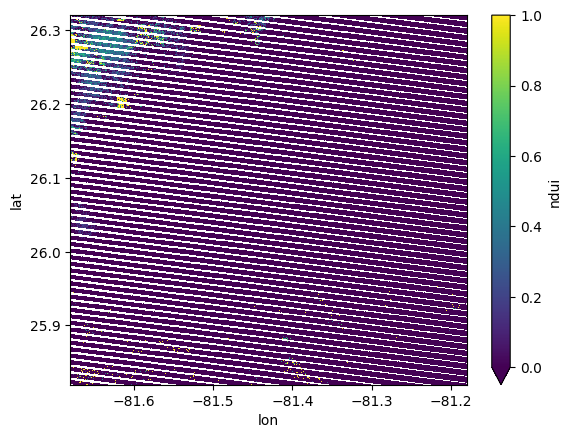

In [ ]:
ds_ndui_c.ndui.plot(vmin=0)

In [ ]:
mask = ds_dyn_built.built > 0.2

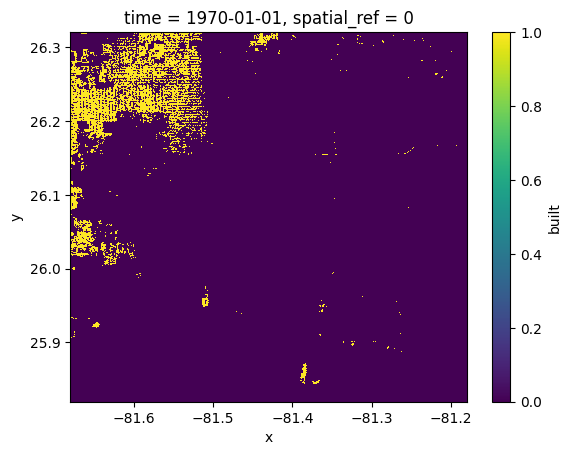

In [ ]:
mask.plot()

In [ ]:
ds_ndui_c.ndui

<xarray.DataArray 'ndui' (lat: 1858, lon: 1856)> Size: 28MB
array([[-0.24428885, -0.24474241, -0.11447468, ...,         nan,
                nan,         nan],
       [-0.11380276, -0.11461007, -0.03739717, ..., -0.99736109,
        -0.99856256, -0.99939838],
       [ 0.063292  , -0.03238496,  0.05015006, ..., -0.99794356,
        -0.9984168 , -0.99941234],
       ...,
       [        nan,         nan,         nan, ..., -0.99624293,
        -0.99769195, -0.99840796],
       [        nan,         nan,         nan, ..., -0.99636403,
        -0.9977664 , -0.99917074],
       [        nan,         nan,         nan, ..., -0.99678437,
        -0.99802478, -0.99919841]])
Coordinates:
  * lat      (lat) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
  * lon      (lon) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18

In [ ]:
ndui_collier_np = ds_ndui_c.ndui.values*mask.values

In [ ]:
ndui_collier_np.shape

(1, 1858, 1856)

In [ ]:
ds_ndui_c['ndui_mask'] = (('lat', 'lon'), ndui_collier_np[0,:,:])
ds_ndui_c

<xarray.Dataset> Size: 55MB
Dimensions:    (lat: 1858, lon: 1856)
Coordinates:
  * lat        (lat) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
  * lon        (lon) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
Data variables:
    ndui       (lat, lon) float64 28MB -0.2443 -0.2447 ... -0.998 -0.9992
    ndui_mask  (lat, lon) float64 28MB -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0

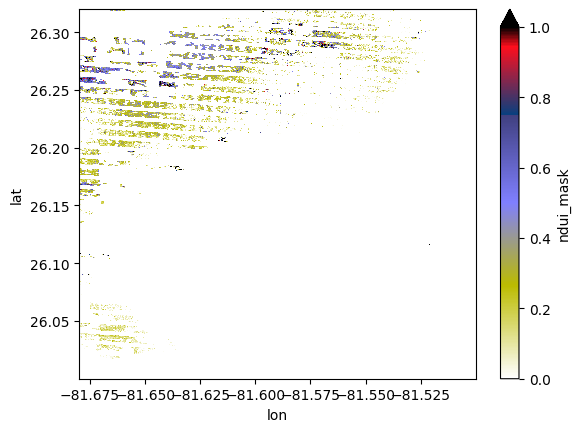

In [ ]:
ds_ndui_c.sel(lon=slice(-81.68,-81.5)).sel(lat=slice(26.32,26)).ndui_mask.plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max')

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib.patheffects as PathEffects
city_names

['Collier']

In [ ]:
# Get the road network within Austin
road_network = ox.graph_from_place(city_names[0], network_type='all')
# Convert road network to GeoDataFrame
road_edges = ox.graph_to_gdfs(road_network, nodes=False, edges=True)
# Filter for major roads (primary, secondary, tertiary)
major_road_types = ['primary', 'secondary', 'tertiary']
major_road_types = ['primary', 'secondary', 'tertiary', 'residential']
major_roads = road_edges[road_edges['highway'].isin(major_road_types)]

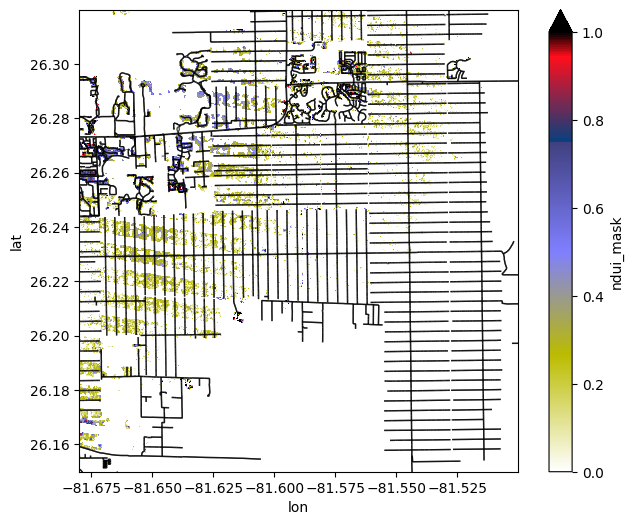

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.sel(lon=slice(-81.68,-81.5)).sel(lat=slice(26.32,26.15)).ndui_mask.plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max', ax=axes)

# Flooding during Hurricane Milton over Collier County

Hurricane made landfall on Oct 9, 2024

https://www.naplesnews.com/story/news/local/2024/10/23/collier-county-saw-280-million-in-property-damage-by-hurricane-milton/75778230007/

# Dynamic World

In [ ]:
collection = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1')
dynamic = collection.filterDate('2024-10-01', '2024-10-31').filterBounds(aoi_city_smaller).select('water')
ds_dyn_water = dynamic.wx.to_xarray(region=aoi_city_smaller.bounds(), scale=30)

Requesting data:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
ds_dyn_water

<xarray.Dataset> Size: 359MB
Dimensions:      (time: 13, x: 1856, y: 1858)
Coordinates:
  * time         (time) datetime64[ns] 104B 2024-10-01T16:06:03 ... 2024-10-2...
  * x            (x) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
  * y            (y) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
    spatial_ref  int64 8B 0
Data variables:
    water        (time, y, x) float64 359MB nan nan nan nan ... nan nan nan nan
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

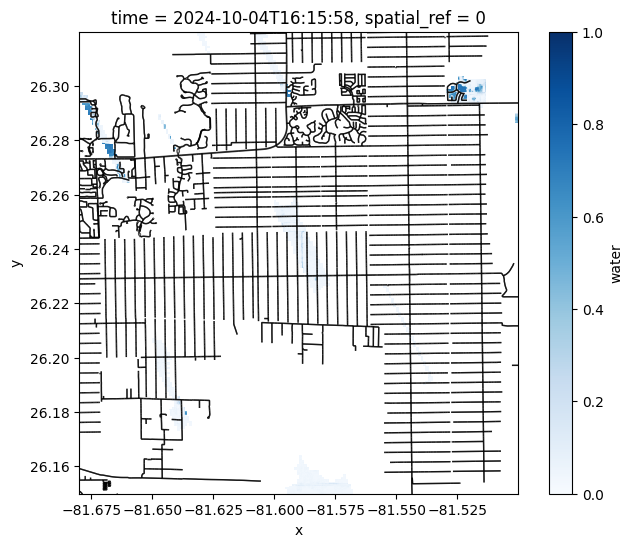

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_dyn_water.water.isel(time=2).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes, vmin=0, vmax=1)

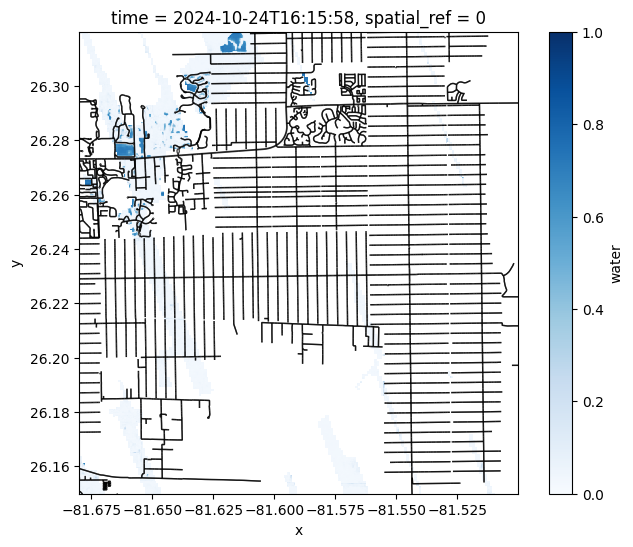

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_dyn_water.water.isel(time=7).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes, vmin=0, vmax=1)

# Sentinel 1

In [ ]:
dataset=ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2024-10-01', '2024-10-31').filterBounds(aoi_city_smaller).select('VV')
# dataset = dataset.set('system:time_start', 0)
ds_s1 = dataset.wx.to_xarray(region=aoi_city_smaller.bounds(),scale=30)
ds_s1

Requesting data:   0%|          | 0/9 [00:00<?, ?it/s]

<xarray.Dataset> Size: 248MB
Dimensions:      (time: 9, x: 1856, y: 1858)
Coordinates:
  * time         (time) datetime64[ns] 72B 2024-10-03T23:28:22 ... 2024-10-27...
  * x            (x) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
  * y            (y) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
    spatial_ref  int64 8B 0
Data variables:
    VV           (time, y, x) float64 248MB nan nan nan nan ... nan nan nan nan
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

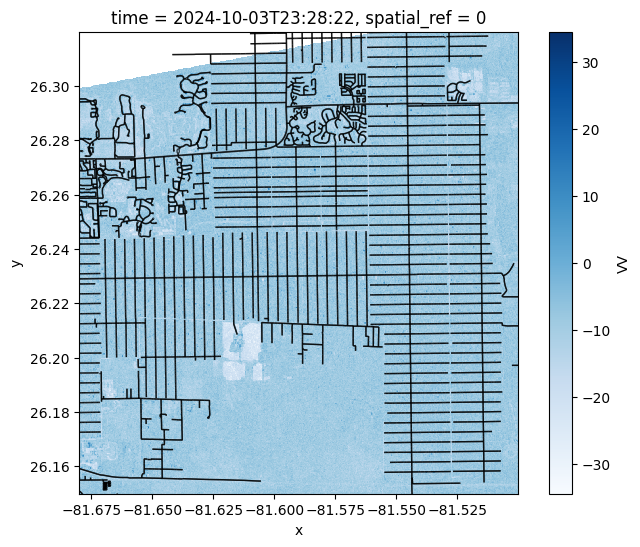

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=0).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

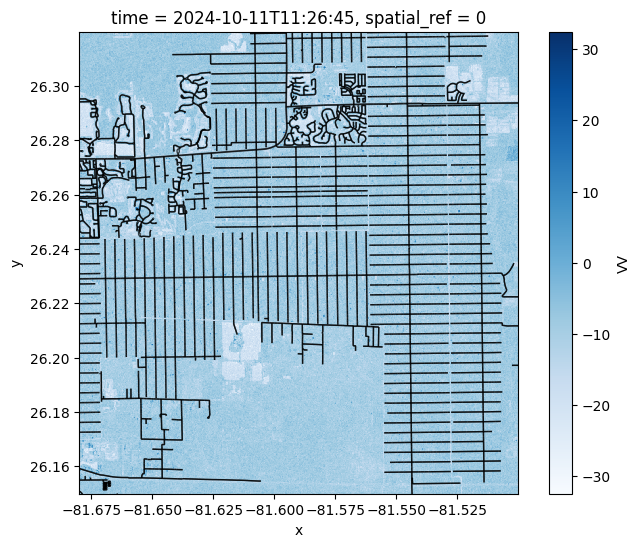

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=3).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

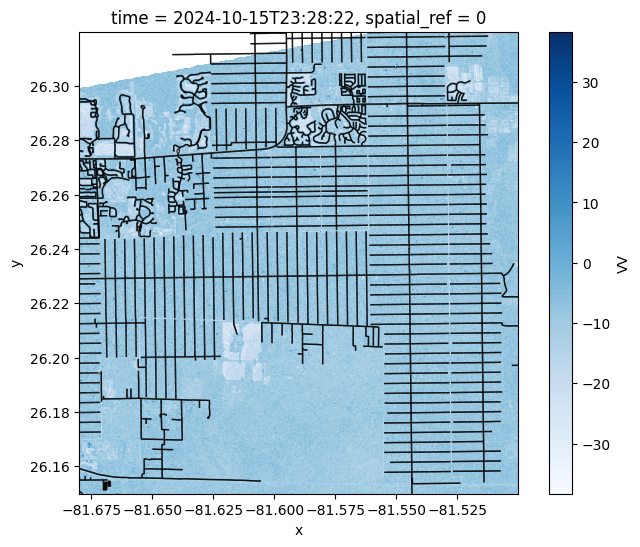

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=4).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

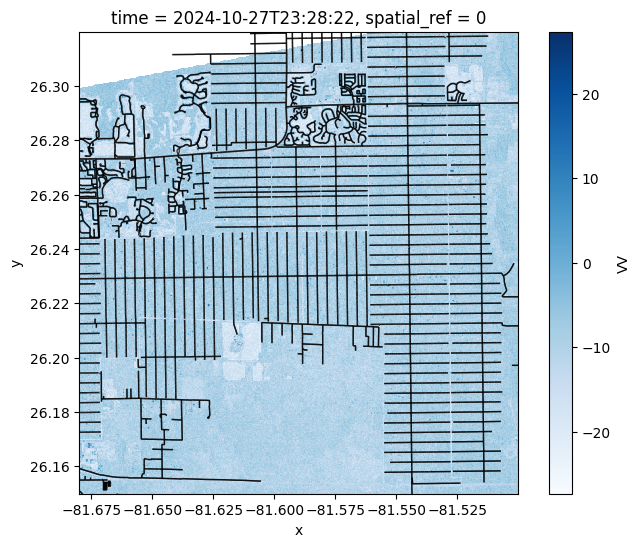

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=7).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

# Lets take 3 Oct as before flooding and 15 Oct as after flooding

In [ ]:
s1_diff = ds_s1.VV.isel(time=4) - ds_s1.VV.isel(time=0)
s1_diff

<xarray.DataArray 'VV' (y: 1858, x: 1856)> Size: 28MB
array([[        nan,         nan,         nan, ...,  1.90093625,
        -3.29352487, -1.65945365],
       [        nan,         nan,         nan, ...,  2.47547981,
         1.41459374,  1.27980437],
       [        nan,         nan,         nan, ..., -1.13466902,
         0.0400986 ,  0.84664158],
       ...,
       [-0.05401692,  3.18219737, -1.11348861, ...,  0.51835419,
         1.68976235, -2.8488302 ],
       [ 0.7139414 , -1.4881273 , -0.47020143, ..., -0.08909643,
        -0.04628938,  0.4150616 ],
       [-0.16244515, -0.30838304,  0.84408059, ..., -0.26830385,
         1.64841185,  1.44879577]])
Coordinates:
  * x            (x) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
  * y            (y) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
    spatial_ref  int64 8B 0

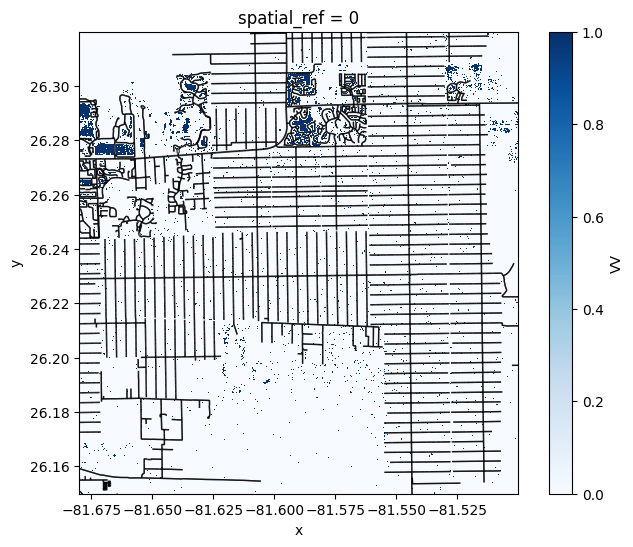

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
s1_diff_mask = s1_diff<-6 # Over flat areas 6 dB reduction is assumed to cause flooding
s1_diff_mask.sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

# Flooded Infrastructure

In [ ]:
flooded_infrastructure_np = s1_diff_mask.values*ds_ndui_c.ndui_mask.values
ds_ndui_c['flooded_infrastructure'] = (('lat', 'lon'), flooded_infrastructure_np)
ds_ndui_c

<xarray.Dataset> Size: 83MB
Dimensions:                 (lat: 1858, lon: 1856)
Coordinates:
  * lat                     (lat) float64 15kB 26.32 26.32 26.32 ... 25.82 25.82
  * lon                     (lon) float64 15kB -81.68 -81.68 ... -81.18 -81.18
Data variables:
    ndui                    (lat, lon) float64 28MB -0.2443 -0.2447 ... -0.9992
    ndui_mask               (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0
    flooded_infrastructure  (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0

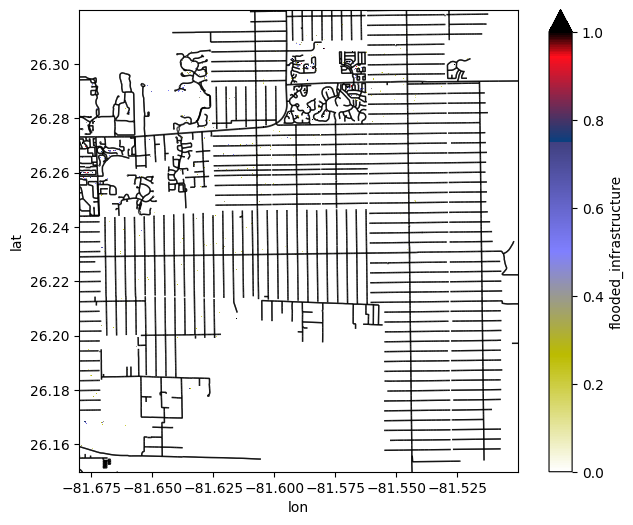

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.flooded_infrastructure.sel(lat=slice(26.32,26.15)).sel(lon=slice(-81.68,-81.5)).plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max', ax=axes)

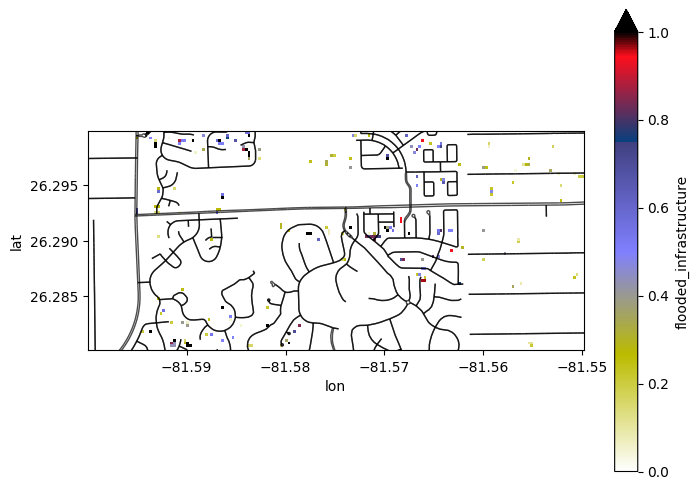

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.flooded_infrastructure.sel(lat=slice(26.3,26.28)).sel(lon=slice(-81.6,-81.55)).plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max', ax=axes)

In [ ]:
ds_ndui_c['dollar_loss'] = (ds_ndui_c.flooded_infrastructure/ds_ndui_c.flooded_infrastructure.sum(skipna=True))*280000000
ds_ndui_c

<xarray.Dataset> Size: 110MB
Dimensions:                 (lat: 1858, lon: 1856)
Coordinates:
  * lat                     (lat) float64 15kB 26.32 26.32 26.32 ... 25.82 25.82
  * lon                     (lon) float64 15kB -81.68 -81.68 ... -81.18 -81.18
Data variables:
    ndui                    (lat, lon) float64 28MB -0.2443 -0.2447 ... -0.9992
    ndui_mask               (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0
    flooded_infrastructure  (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0
    dollar_loss             (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0

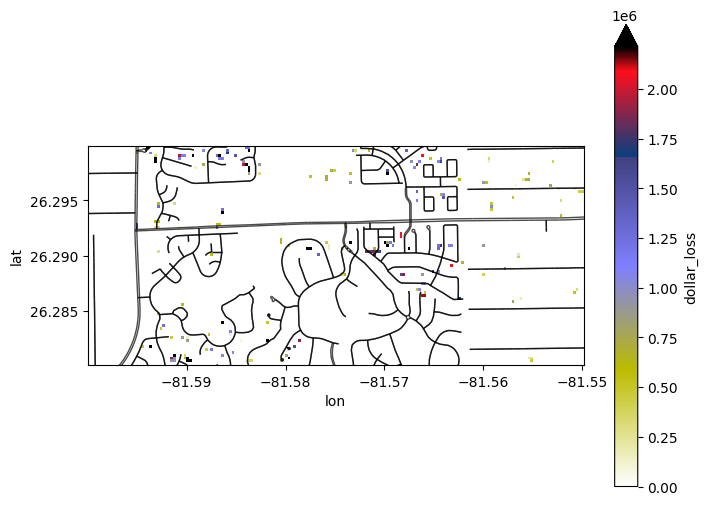

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.dollar_loss.sel(lat=slice(26.3,26.28)).sel(lon=slice(-81.6,-81.55)).plot(cmap='gist_stern_r', vmin=0,  extend='max', ax=axes)